# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 02 — Data Types and Visualization
**Instructor:** Amir Charkhi  |  **Goal:** Master data types and create compelling visualizations for data storytelling.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Identify and classify different data types (nominal, ordinal, interval, ratio)
- Choose appropriate visualizations for each data type
- Create effective charts that tell clear stories
- Avoid common visualization pitfalls and misleading charts

## 1. Understanding Data Types
**The foundation of good analysis**: Know your data before you visualize it!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [2]:
# Real customer dataset
np.random.seed(42)
customers = {
    'customer_id': range(1, 9),
    'age': [25, 34, 45, 23, 67, 29, 38, 52],
    'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'satisfaction': ['Good', 'Excellent', 'Fair', 'Good', 'Poor', 'Excellent', 'Good', 'Fair'],
    'purchases': [3, 7, 2, 9, 1, 12, 5, 4],
    'spending': [150.50, 320.75, 89.99, 450.00, 25.99, 780.25, 210.80, 167.45]
}

df = pd.DataFrame(customers)
print("📊 Customer Data Sample:")
print(df)

📊 Customer Data Sample:
   customer_id  age gender satisfaction  purchases  spending
0            1   25      M         Good          3    150.50
1            2   34      F    Excellent          7    320.75
2            3   45      M         Fair          2     89.99
3            4   23      F         Good          9    450.00
4            5   67      M         Poor          1     25.99
5            6   29      F    Excellent         12    780.25
6            7   38      M         Good          5    210.80
7            8   52      F         Fair          4    167.45


### 1.1 The Four Data Types

In [3]:
# Analyze our data types
print("🔍 Data Type Analysis:")
print(f"customer_id: Nominal (just labels)")
print(f"age: Ratio (meaningful zero, can multiply/divide)")
print(f"gender: Nominal (categories, no order)")
print(f"satisfaction: Ordinal (Poor < Fair < Good < Excellent)")
print(f"purchases: Ratio (count data, meaningful zero)")
print(f"spending: Ratio (continuous, meaningful zero)")

🔍 Data Type Analysis:
customer_id: Nominal (just labels)
age: Ratio (meaningful zero, can multiply/divide)
gender: Nominal (categories, no order)
satisfaction: Ordinal (Poor < Fair < Good < Excellent)
purchases: Ratio (count data, meaningful zero)
spending: Ratio (continuous, meaningful zero)


In [4]:
# Quick data exploration
print("📈 Quick Stats:")
print(f"Average age: {df['age'].mean():.1f} years")
print(f"Total customers: {len(df)}")
print(f"Gender split: {df['gender'].value_counts().to_dict()}")
print(f"Most common satisfaction: {df['satisfaction'].mode()[0]}")

📈 Quick Stats:
Average age: 39.1 years
Total customers: 8
Gender split: {'M': 4, 'F': 4}
Most common satisfaction: Good


**Exercise 1 — Data Type Classification (easy)**  
Classify each variable from a streaming service dataset.


In [ ]:
# Your turn
streaming_data = {
    'user_id': ['U001', 'U002', 'U003'],
    'subscription_type': ['Basic', 'Premium', 'Basic'],
    'rating': ['★★★★☆', '★★★☆☆', '★★★★★'],
    'watch_time_hours': [12.5, 8.2, 15.7],
    'device_type': ['Mobile', 'TV', 'Laptop']
}

# Classify each variable as: Nominal, Ordinal, Interval, or Ratio


<details>
<summary><b>Solution</b></summary>

```python
classifications = {
    'user_id': 'Nominal - just identifiers, no meaningful order',
    'subscription_type': 'Ordinal - Basic < Premium (ordered levels)',
    'rating': 'Ordinal - ★ < ★★ < ★★★ < ★★★★ < ★★★★★',
    'watch_time_hours': 'Ratio - continuous, meaningful zero, can say "2x more"',
    'device_type': 'Nominal - categories with no natural order'
}

print("📱 Streaming Data Classification:")
for var, classification in classifications.items():
    print(f"{var}: {classification}")
```
</details>

## 2. Categorical Data Visualization

### 2.1 Bar Charts: The Workhorse

In [6]:
gender_counts.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, M to F
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


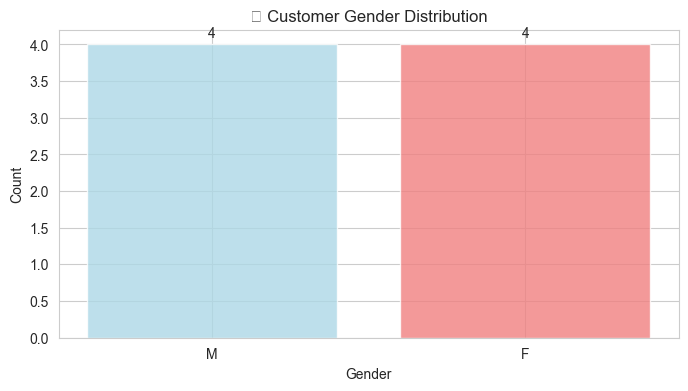

In [5]:
# Gender distribution
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 4))
bars = plt.bar(gender_counts.index, gender_counts.values, 
               color=['lightblue', 'lightcoral'], alpha=0.8)
plt.title('👥 Customer Gender Distribution')
plt.ylabel('Count')
plt.xlabel('Gender')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{int(height)}', ha='center', va='bottom')
plt.show()

### 2.2 Ordered Categories Need Special Care

C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128522 (\N{SMILING FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


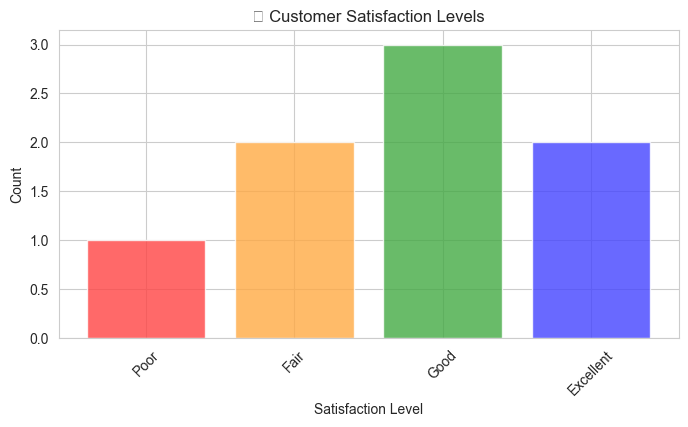

In [7]:
# Satisfaction with proper ordering
satisfaction_order = ['Poor', 'Fair', 'Good', 'Excellent']
satisfaction_counts = df['satisfaction'].value_counts().reindex(satisfaction_order)

plt.figure(figsize=(8, 4))
colors = ['#ff4444', '#ffaa44', '#44aa44', '#4444ff']
bars = plt.bar(satisfaction_counts.index, satisfaction_counts.values, 
               color=colors, alpha=0.8)
plt.title('😊 Customer Satisfaction Levels')
plt.ylabel('Count')
plt.xlabel('Satisfaction Level')
plt.xticks(rotation=45)
plt.show()

### 2.3 When NOT to Use Pie Charts

C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\3926536801.py:16: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\3926536801.py:16: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


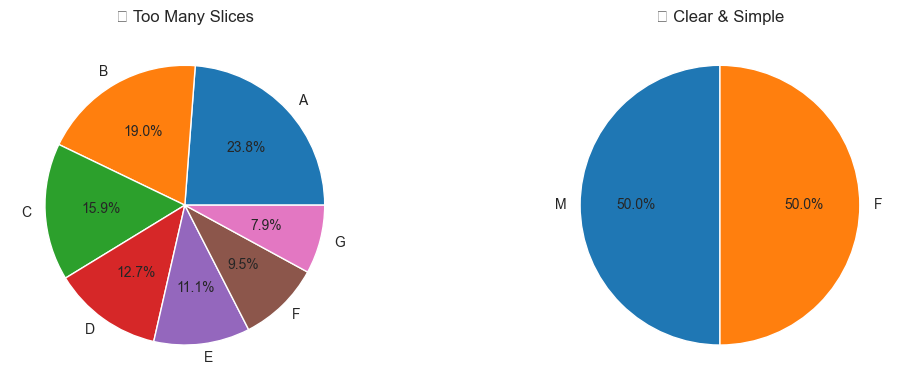

In [8]:
# Pie chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bad: Too many categories
many_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
values = [15, 12, 10, 8, 7, 6, 5]
ax1.pie(values, labels=many_categories, autopct='%1.1f%%')
ax1.set_title('❌ Too Many Slices')

# Good: Simple comparison
simple_data = df['gender'].value_counts()
ax2.pie(simple_data.values, labels=simple_data.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('✅ Clear & Simple')

plt.tight_layout()
plt.show()

## 3. Numerical Data Visualization

### 3.1 Histograms: Show the Shape

C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


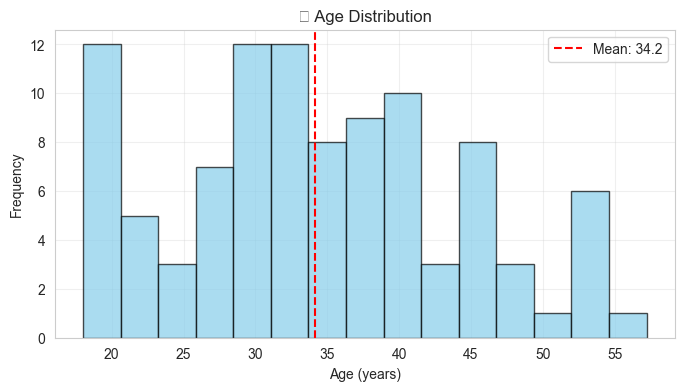

In [9]:
# Generate more realistic age data
np.random.seed(42)
ages = np.random.normal(35, 12, 100)
ages = np.clip(ages, 18, 80)  # Realistic age range

plt.figure(figsize=(8, 4))
plt.hist(ages, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(ages.mean(), color='red', linestyle='--', 
           label=f'Mean: {ages.mean():.1f}')
plt.title('📊 Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2 Box Plots: Spot Outliers Instantly

C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\1018287102.py:17: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


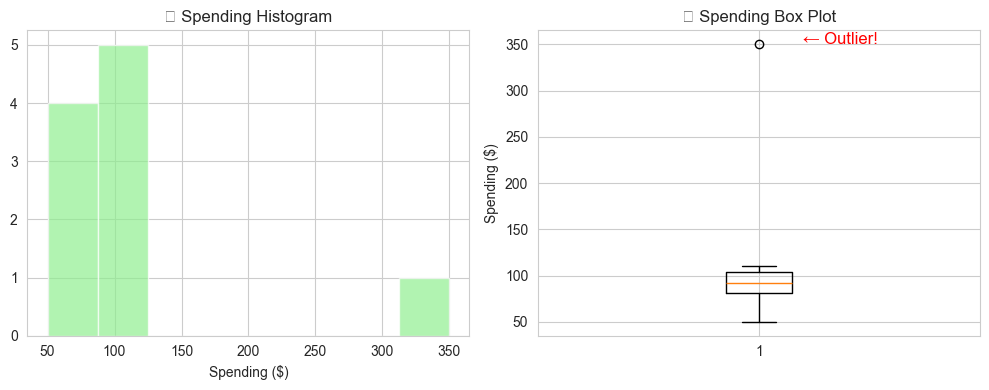

In [10]:
# Box plot reveals distribution details
spending_data = [50, 75, 80, 85, 90, 95, 100, 105, 110, 350]  # Note the outlier!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Histogram
ax1.hist(spending_data, bins=8, alpha=0.7, color='lightgreen')
ax1.set_title('💰 Spending Histogram')
ax1.set_xlabel('Spending ($)')

# Box plot shows outlier clearly
ax2.boxplot(spending_data, vert=True)
ax2.set_title('💰 Spending Box Plot')
ax2.set_ylabel('Spending ($)')
ax2.text(1.1, 350, '← Outlier!', fontsize=12, color='red')

plt.tight_layout()
plt.show()

**Exercise 2 — Choosing the Right Chart (medium)**  
Match each scenario with the best visualization.


In [ ]:
# Your turn
scenarios = [
    "Compare sales across 5 product categories",
    "Show distribution of customer ages", 
    "Display relationship between price and demand",
    "Compare market share of 3 companies",
    "Show monthly revenue over 2 years"
]

chart_types = ['Bar chart', 'Histogram', 'Scatter plot', 'Pie chart', 'Line chart']

# Match each scenario with best chart type


<details>
<summary><b>Solution</b></summary>

```python
matches = {
    "Compare sales across 5 product categories": "Bar chart",
    "Show distribution of customer ages": "Histogram", 
    "Display relationship between price and demand": "Scatter plot",
    "Compare market share of 3 companies": "Pie chart",
    "Show monthly revenue over 2 years": "Line chart"
}

print("🎯 Chart Selection Guide:")
for scenario, chart in matches.items():
    print(f"• {scenario} → {chart}")
    
print("\n💡 Key principles:")
print("• Bar charts: Compare categories")
print("• Histograms: Show distributions")
print("• Scatter plots: Show relationships")
print("• Pie charts: Parts of a whole (max 5 categories)")
print("• Line charts: Trends over time")
```
</details>

## 4. Advanced Seaborn Visualizations

In [11]:
# Create realistic dataset for advanced examples
np.random.seed(42)
n = 200
advanced_data = pd.DataFrame({
    'age': np.random.randint(18, 70, n),
    'income': np.random.normal(50000, 15000, n),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n),
    'satisfaction': np.random.choice(['Poor', 'Fair', 'Good', 'Excellent'], n),
    'department': np.random.choice(['Sales', 'Marketing', 'Engineering', 'HR'], n)
})

print(f"📈 Advanced Dataset: {advanced_data.shape}")
print(advanced_data.head(3))

📈 Advanced Dataset: (200, 5)
   age        income    education satisfaction department
0   56  51905.183591       Master         Poor  Marketing
1   69  31258.344158  High School         Poor      Sales
2   46  79176.734217          PhD         Fair  Marketing


C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\4004168663.py:24: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\4004168663.py:24: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\4004168663.py:24: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\4004168663.py:24: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N

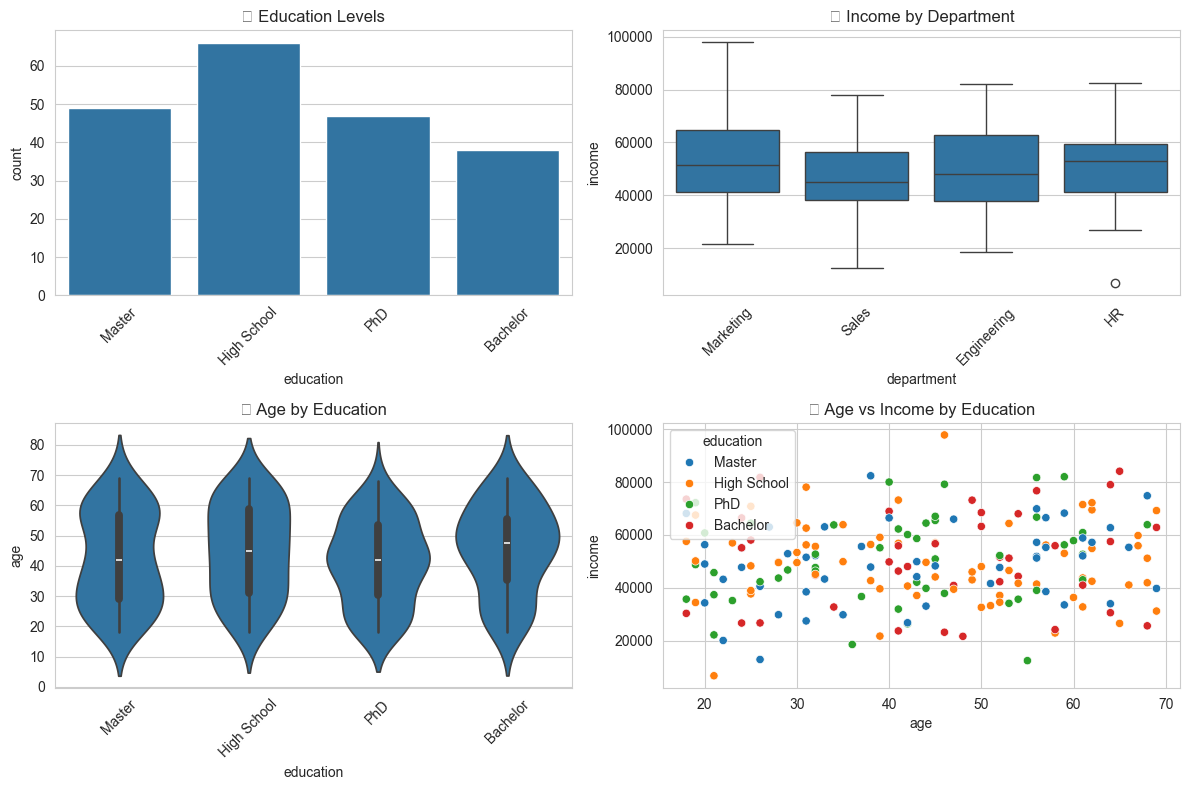

In [12]:
# Multiple comparisons with seaborn
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Count plot
sns.countplot(data=advanced_data, x='education', ax=ax1)
ax1.set_title('🎓 Education Levels')
ax1.tick_params(axis='x', rotation=45)

# Box plot by category
sns.boxplot(data=advanced_data, x='department', y='income', ax=ax2)
ax2.set_title('💼 Income by Department')
ax2.tick_params(axis='x', rotation=45)

# Violin plot (like box plot but shows shape)
sns.violinplot(data=advanced_data, x='education', y='age', ax=ax3)
ax3.set_title('🎻 Age by Education')
ax3.tick_params(axis='x', rotation=45)

# Scatter plot with categories
sns.scatterplot(data=advanced_data, x='age', y='income', 
               hue='education', ax=ax4)
ax4.set_title('💰 Age vs Income by Education')

plt.tight_layout()
plt.show()

## 5. Avoiding Visualization Pitfalls

### 5.1 The Misleading Y-Axis Trap

C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\2016947354.py:21: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\2016947354.py:21: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Olivia\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


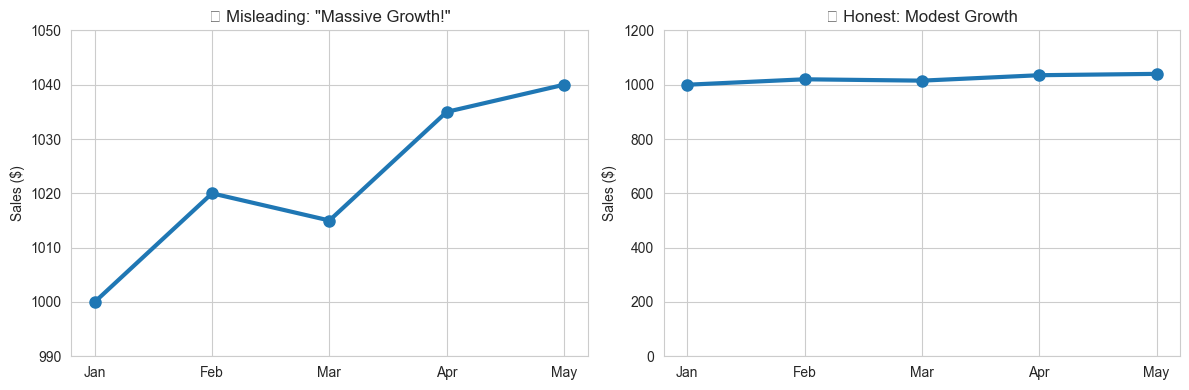

🎯 Key lesson: Always consider if your y-axis tells the truth!


In [13]:
# Demonstrate misleading scales
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales = [1000, 1020, 1015, 1035, 1040]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Misleading: Truncated y-axis
ax1.plot(months, sales, marker='o', linewidth=3, markersize=8)
ax1.set_ylim(990, 1050)
ax1.set_title('❌ Misleading: "Massive Growth!"')
ax1.set_ylabel('Sales ($)')
ax1.grid(True)

# Honest: Full scale
ax2.plot(months, sales, marker='o', linewidth=3, markersize=8)
ax2.set_ylim(0, 1200)
ax2.set_title('✅ Honest: Modest Growth')
ax2.set_ylabel('Sales ($)')
ax2.grid(True)

plt.tight_layout()
plt.show()

print("🎯 Key lesson: Always consider if your y-axis tells the truth!")

### 5.2 Color and Accessibility

C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\2335751077.py:19: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Olivia\AppData\Local\Temp\ipykernel_25340\2335751077.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()


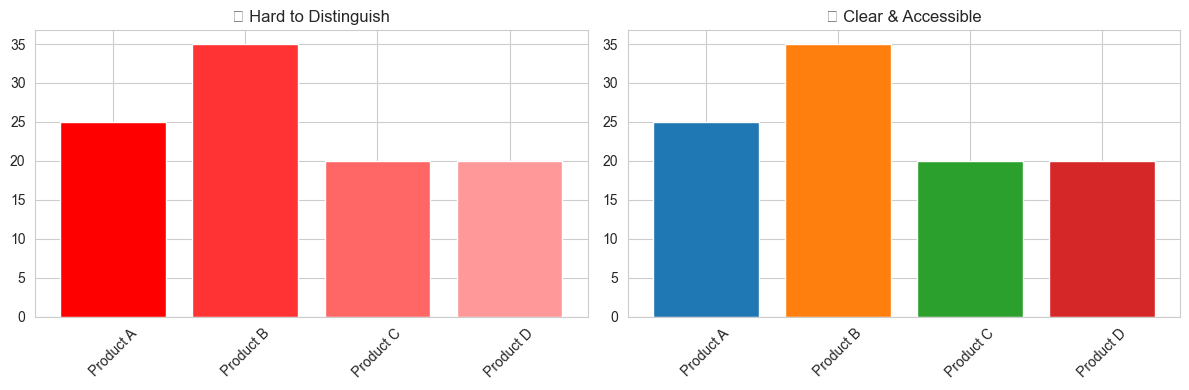

In [14]:
# Good color practices
categories = ['Product A', 'Product B', 'Product C', 'Product D']
values = [25, 35, 20, 20]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Bad: Similar colors
bad_colors = ['#ff0000', '#ff3333', '#ff6666', '#ff9999']
ax1.bar(categories, values, color=bad_colors)
ax1.set_title('❌ Hard to Distinguish')
ax1.tick_params(axis='x', rotation=45)

# Good: Distinct colors
good_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax2.bar(categories, values, color=good_colors)
ax2.set_title('✅ Clear & Accessible')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Exercise 3 — Fix the Bad Chart (hard)**  
Identify and fix issues in a problematic visualization.


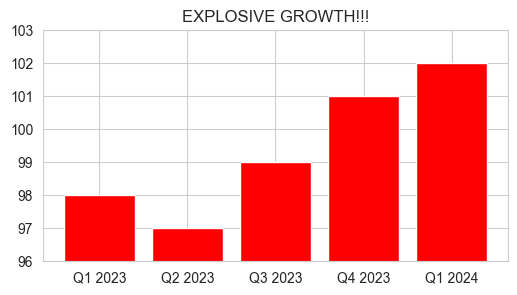

In [16]:
# Your turn - this chart has multiple problems!
bad_data = {
    'Q1 2023': 98,
    'Q2 2023': 97,
    'Q3 2023': 99,
    'Q4 2023': 101,
    'Q1 2024': 102
}

# Bad chart (identify the problems)
plt.figure(figsize=(6, 3))
plt.bar(bad_data.keys(), bad_data.values(), color='red')
plt.ylim(96, 103)
plt.title('EXPLOSIVE GROWTH!!!')
plt.show()

# Now create a better version


<details>
<summary><b>Solution</b></summary>

```python
# Problems with the bad chart:
print("🚨 Problems identified:")
print("1. Misleading y-axis (starts at 96, not 0)")
print("2. Exaggerated title ('EXPLOSIVE GROWTH')")
print("3. Poor color choice (aggressive red)")
print("4. Too small figure size")
print("5. No axis labels")
print("6. Data doesn't support 'explosive' claim")

# Fixed version
plt.figure(figsize=(10, 6))
bars = plt.bar(bad_data.keys(), bad_data.values(), 
               color='steelblue', alpha=0.7, edgecolor='black')
plt.ylim(0, 120)  # Start from 0
plt.title('Quarterly Performance: Steady Growth', fontsize=14)
plt.xlabel('Quarter')
plt.ylabel('Performance Score')
plt.grid(True, alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n✅ Fixed version shows:")
print("• Honest scale starting from 0")
print("• Accurate, non-misleading title")
print("• Professional color scheme")
print("• Proper labels and formatting")
print("• Data in context - modest, steady improvement")
```
</details>

## 6. Mini-Challenges
- **M1 (easy):** Create a dashboard showing employee satisfaction by department using multiple chart types
- **M2 (medium):** Build a correlation heatmap for numerical variables and interpret the patterns
- **M3 (hard):** Design an interactive visualization that tells a data story about customer behavior

In [15]:
# Your turn - try the challenges!
# M1 Data:
employee_data = {
    'dept': ['Sales', 'Sales', 'Engineering', 'Engineering', 'HR', 'HR'],
    'satisfaction': [4, 3, 5, 4, 3, 4],  # 1-5 scale
    'tenure': [2, 5, 1, 7, 3, 4]  # years
}

# M2: Use advanced_data from earlier
# M3: Be creative with storytelling!


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Employee Dashboard
emp_df = pd.DataFrame(employee_data)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('👥 Employee Satisfaction Dashboard', fontsize=16)

# Bar chart - average satisfaction by dept
dept_satisfaction = emp_df.groupby('dept')['satisfaction'].mean()
dept_satisfaction.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Average Satisfaction by Department')
ax1.set_ylabel('Satisfaction (1-5)')
ax1.tick_params(axis='x', rotation=45)

# Histogram - satisfaction distribution
ax2.hist(emp_df['satisfaction'], bins=5, alpha=0.7, color='lightgreen')
ax2.set_title('Satisfaction Score Distribution')
ax2.set_xlabel('Satisfaction Score')

# Scatter - tenure vs satisfaction
ax3.scatter(emp_df['tenure'], emp_df['satisfaction'], alpha=0.7, s=100)
ax3.set_xlabel('Tenure (years)')
ax3.set_ylabel('Satisfaction')
ax3.set_title('Tenure vs Satisfaction')

# Box plot - satisfaction by department
emp_df.boxplot(column='satisfaction', by='dept', ax=ax4)
ax4.set_title('Satisfaction Distribution by Dept')

plt.tight_layout()
plt.show()

# M2 - Correlation Heatmap
numerical_cols = ['age', 'income']
corr_matrix = advanced_data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('🔥 Correlation Heatmap')
plt.show()

print("\n📊 M2 Insights:")
print(f"Age-Income correlation: {corr_matrix.loc['age', 'income']:.3f}")
if abs(corr_matrix.loc['age', 'income']) > 0.3:
    print("→ Moderate relationship between age and income")
else:
    print("→ Weak relationship between age and income")

# M3 - Data Story
print("\n📖 M3 Data Story Framework:")
print("1. Hook: Start with surprising insight")
print("2. Context: Provide background")
print("3. Conflict: Show the problem/challenge")
print("4. Resolution: Present solution/finding")
print("5. Call to Action: What should audience do?")
print("\nExample: 'Despite hiring more PhDs, customer satisfaction")
print("hasn't improved. Here's why...'")
```
</details>

## Wrap-Up & Next Steps
✅ You can identify and classify different data types correctly  
✅ You know which chart type works best for each data type  
✅ You can create effective, honest visualizations using Python  
✅ You can spot and avoid common visualization pitfalls  

**Next:** Descriptive Statistics - Dive deep into measures of central tendency and spread!
